<div class="text-primary">
    <div class="text-center">
        <div class="h1">practise 3 - titanic</div>
        <div class="h5">maktabkhooneh</div>
    </div>
    <div class="h4">Name: Amir Mohammad Arghavany</div>
    <div class="h4">Email: amir.arghavoon@gmail.com</div>
</div>

# import

In [1]:
# base packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# preprocessing packages
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
# learning packages
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# accuracy packages
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, recall_score
# warnings ignore
import warnings
warnings.filterwarnings('ignore')

# load dataset

In [2]:
df_train = pd.read_csv('D:\DRIVER\LEARNING\OUT OF UNIVERSITY\ML\Quize\Q3\{}'.format('train.csv'))
df_X_test = pd.read_csv('D:\DRIVER\LEARNING\OUT OF UNIVERSITY\ML\Quize\Q3\{}'.format('test.csv'))
df_Y_test = pd.read_csv('D:\DRIVER\LEARNING\OUT OF UNIVERSITY\ML\Quize\Q3\sampleSubmission.csv')

# preprocessing

In [3]:
# check
def check_df(df_dict):
    for i in df_dict:
        print('*'*80, '<<< {} >>>'.format(i), '\n', '='*40, '< sample >')
        print(df_dict[i].head(3), '\n', '='*40, '< nunique >')
        print(df_dict[i].nunique(), '\n', '='*40, '< isnull >')
        print(df_dict[i].isnull().sum(), '\n', '='*40, '< info >')
        print(df_dict[i].info())

df_dict_1 = {'df_train': df_train,
             'df_X_test': df_X_test,
             'df_Y_test': df_Y_test}
check_df(df_dict_1)

******************************************************************************** <<< df_train >>> 
 ======================================== < sample >
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S   
 ======================================== < nunique >
PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp        

In [4]:
# drop unusefull informations
# Ticket and Name and PassengerId is unique and Cabin has too many null data (687/891)
for i in [df_train, df_X_test]:
    i.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], inplace=True, axis=1)
df_Y_test.drop('PassengerId', inplace=True, axis=1)

In [5]:
# categorical to numerical
LE = LabelEncoder()
df_dict = {
    'df_train': df_train,
    'df_X_test': df_X_test
}
for i in df_dict:
    for j in ['Sex', 'Embarked']:
        print('-'*20, '<{} - {}>'.format(i, j))
        print('before: ', df_dict[i][j].unique())
        df_dict[i][j] = LE.fit_transform(df_dict[i][j])
        print('after: ', df_dict[i][j].unique())

-------------------- <df_train - Sex>
before:  ['male' 'female']
after:  [1 0]
-------------------- <df_train - Embarked>
before:  ['S' 'C' 'Q' nan]
after:  [2 0 1 3]
-------------------- <df_X_test - Sex>
before:  ['male' 'female']
after:  [1 0]
-------------------- <df_X_test - Embarked>
before:  ['Q' 'S' 'C']
after:  [1 2 0]


In [6]:
# missing value (categorical)
imputer = SimpleImputer(missing_values=3, strategy='most_frequent')
df_train['Embarked'] = imputer.fit_transform(df_train[['Embarked']])

In [7]:
# missign value (numerical)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df_train['Age'] = imputer.fit_transform(df_train[['Age']])
df_X_test['Age'] = imputer.fit_transform(df_X_test[['Age']])
df_X_test['Fare'] = imputer.fit_transform(df_X_test[['Fare']])

In [8]:
# recheck
check_df(df_dict_1)

******************************************************************************** <<< df_train >>> 
 ======================================== < sample >
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         2 
 ======================================== < nunique >
Survived      2
Pclass        3
Sex           2
Age          89
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64 
 ======================================== < isnull >
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64 
 ======================================== < info >
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    -------

# split data

In [9]:
target = 'Survived'
X_train, Y_train = df_train.drop(target, axis=1), df_train[target]
X_test, Y_test = df_X_test, df_Y_test[target]

# important features

<div class="h3 text-success">using correlation</div>

In [10]:
corr = pd.concat([X_train, Y_train], axis=1).corr()
corr.sort_values(by=['Survived'], ascending=False).iloc[0].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.069809
Embarked   -0.167675
Pclass     -0.338481
Sex        -0.543351
Name: Survived, dtype: float64

<div class="h3 text-success">using random forest</div>

In [11]:
# best parameters for random forest
RFC = RandomForestClassifier()
param = {
    'n_estimators': np.arange(15, 30),
    'criterion': ['gini', 'entropy'],
    'max_depth': [7, 11, 15],
    'random_state': [42]
}
GSCV = GridSearchCV(estimator=RFC, param_grid=param, scoring='accuracy', cv=5)
GSCV.fit(X_train, Y_train)
print(GSCV.best_params_)
print(GSCV.best_score_)

{'criterion': 'entropy', 'max_depth': 11, 'n_estimators': 28, 'random_state': 42}
0.8328227983177452


In [12]:
# using random forest
RFR = RandomForestClassifier(n_estimators=28, criterion='entropy', max_depth=11, random_state=42)
RFR.fit(X_train, Y_train)
feature_imp = RFR.feature_importances_
for i in range(len(feature_imp)):
    print(X_train.columns[i], '->', feature_imp[i])

Pclass -> 0.08949001539802953
Sex -> 0.26626314131892076
Age -> 0.24220982863446938
SibSp -> 0.057646397058568624
Parch -> 0.04462694350564357
Fare -> 0.2623767464817641
Embarked -> 0.03738692760260414


<div class="h3 text-success">using visualization</div>

In [13]:
X_train.nunique()

Pclass        3
Sex           2
Age          89
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

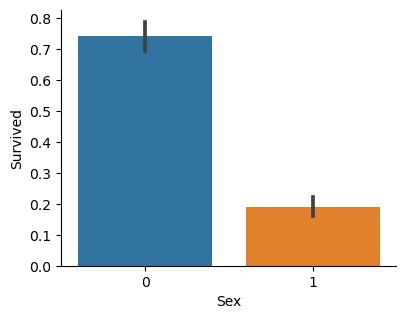

In [14]:
sns.catplot(x='Sex', y='Survived', data=df_train, kind='bar').figure.set_size_inches(4, 3)

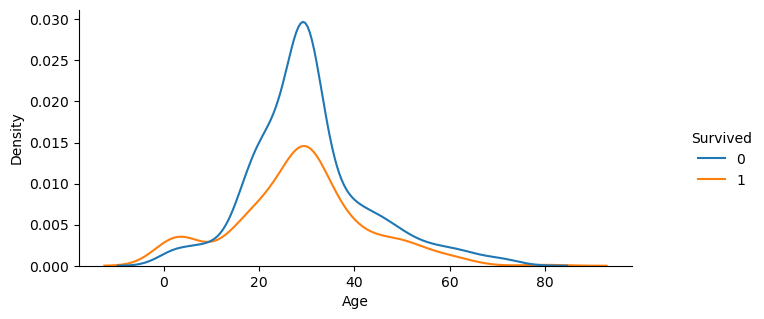

In [15]:
sns.displot(df_train, x='Age', kind='kde', hue='Survived').figure.set_size_inches(8, 3)

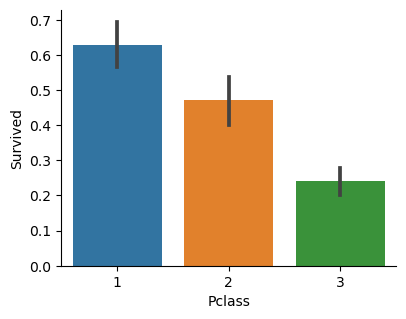

In [16]:
sns.catplot(x='Pclass', y='Survived', data=df_train, kind='bar').figure.set_size_inches(4, 3)

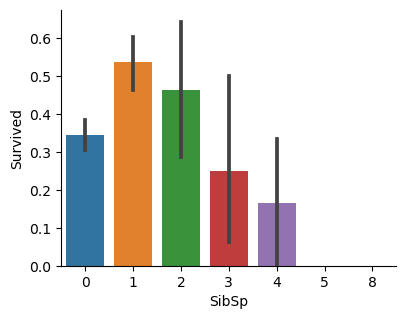

In [17]:
sns.catplot(x='SibSp', y='Survived', data=df_train, kind='bar').figure.set_size_inches(4, 3)

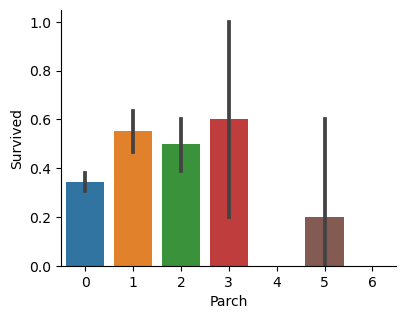

In [18]:
sns.catplot(x='Parch', y='Survived', data=df_train, kind='bar').figure.set_size_inches(4, 3)

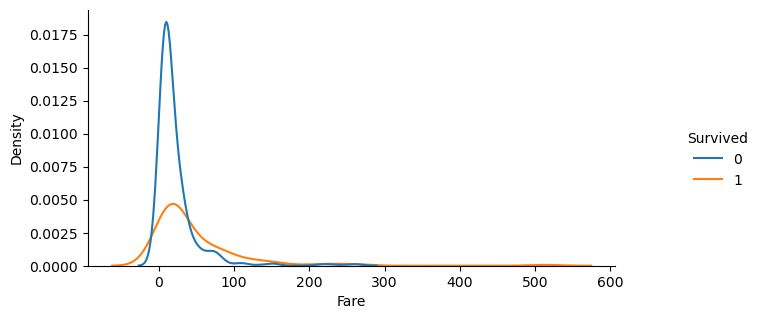

In [19]:
sns.displot(df_train, x='Fare', kind='kde', hue='Survived').figure.set_size_inches(8, 3)

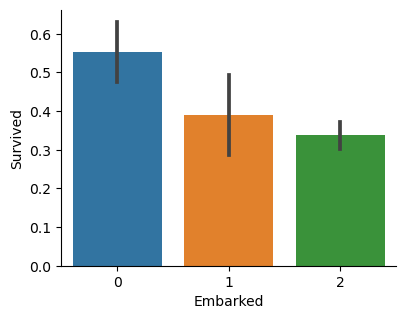

In [20]:
sns.catplot(x='Embarked', y='Survived', data=df_train, kind='bar').figure.set_size_inches(4, 3)

<div class="text-info h3">important features (using correlation, random forest, visualization)</div>

In [21]:
features_vote = {
    'features': ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'],
    'correlation_vote': [1, 1, 0, 0, 0, 1, 1],
    'random_forest_vote': [0, 1, 1, 0, 0, 1, 0],
    'visualization_vote': [1, 1, 1, 1, 0, 1, 1],
    'RESULT': [1, 1, 1, 0, 0, 1, 1]
}
pd.DataFrame(features_vote)

,features,correlation_vote,random_forest_vote,visualization_vote,RESULT
0,Pclass,1,0,1,1
1,Sex,1,1,1,1
2,Age,0,1,1,1
3,SibSp,0,0,1,0
4,Parch,0,0,0,0
5,Fare,1,1,1,1
6,Embarked,1,0,1,1


In [22]:
important_features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']
X_train = X_train[important_features]
X_test = X_test[important_features]

# scaling

In [23]:
SS = StandardScaler()
X_train = pd.DataFrame(SS.fit_transform(X_train), columns=important_features)
X_test = pd.DataFrame(SS.transform(X_test), columns=important_features)

# machine learning

<div class="h2 text-success text-center">Logistic Regression</div>

In [24]:
LR = LogisticRegression()
LR.fit(X_train, Y_train)
LR_pred = LR.predict(X_test)
# False Negative (FN) is the most important score -> recall
print('recall score:', np.round(recall_score(LR_pred, Y_test)*100, 2), '%')
print('-'*65, '\n', classification_report(LR_pred, Y_test))

precision score: 90.74 %
----------------------------------------------------------------- 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       256
           1       0.97      0.91      0.94       162

    accuracy                           0.95       418
   macro avg       0.96      0.94      0.95       418
weighted avg       0.95      0.95      0.95       418



<div class="h2 text-success text-center">KNN</div>

In [25]:
# hyper parameters
KNN = KNeighborsClassifier()
param = {
    'n_neighbors': np.arange(1, 40),
}
GSCV = GridSearchCV(estimator=KNN, param_grid=param, scoring='accuracy', cv=5)
GSCV.fit(X_train, Y_train)
print(GSCV.best_params_)
print(GSCV.best_score_)

{'n_neighbors': 36}
0.8092021844203128


In [26]:
KNN = KNeighborsClassifier(n_neighbors=36)
KNN.fit(X_train, Y_train)
KNN_pred = KNN.predict(X_test)
print('recall score:', np.round(recall_score(KNN_pred, Y_test)*100, 2), '%')
print('-'*65, '\n', classification_report(KNN_pred, Y_test))

recall score: 93.33 %
----------------------------------------------------------------- 
               precision    recall  f1-score   support

           0       0.97      0.87      0.91       298
           1       0.74      0.93      0.82       120

    accuracy                           0.89       418
   macro avg       0.85      0.90      0.87       418
weighted avg       0.90      0.89      0.89       418



<div class="h2 text-success text-center">Gaussian Naive Bayse</div>

In [27]:
GNB = GaussianNB()
GNB.fit(X_train, Y_train)
GNB_pred = GNB.predict(X_test)
print('recall score:', np.round(recall_score(GNB_pred, Y_test)*100, 2), '%')
print('-'*65, '\n', classification_report(GNB_pred, Y_test))

recall score: 79.29 %
----------------------------------------------------------------- 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       249
           1       0.88      0.79      0.83       169

    accuracy                           0.87       418
   macro avg       0.88      0.86      0.87       418
weighted avg       0.87      0.87      0.87       418



<div class="h2 text-success text-center">SVM</div>

In [28]:
SVM_C = SVC()
param = {
    'kernel': ['rbf'],
    'C': np.linspace(1, 4, 10),
    'gamma': np.linspace(0, 0.5, 10),
}
GSCV = GridSearchCV(estimator=SVM_C, param_grid=param, scoring='accuracy', cv=5)
GSCV.fit(X_train, Y_train)
print(GSCV.best_params_)
print(GSCV.best_score_)

{'C': 1.3333333333333333, 'gamma': 0.16666666666666666, 'kernel': 'rbf'}
0.8249199673592369


In [29]:
SVM_C = SVC(kernel='rbf', C=1.333, gamma=0.1667)
SVM_C.fit(X_train, Y_train)
SVM_C_pred = SVM_C.predict(X_test)
print('recall score:', np.round(recall_score(SVM_C_pred, Y_test)*100, 2), '%')
print('-'*65, '\n', classification_report(SVM_C_pred, Y_test))

recall score: 98.23 %
----------------------------------------------------------------- 
               precision    recall  f1-score   support

           0       0.99      0.87      0.92       305
           1       0.73      0.98      0.84       113

    accuracy                           0.90       418
   macro avg       0.86      0.92      0.88       418
weighted avg       0.92      0.90      0.90       418



<div class="h2 text-success text-center">Decision Tree</div>

In [30]:
DTC = DecisionTreeClassifier(criterion='entropy', random_state=42)
DTC.fit(X_train, Y_train)
DTC_pred = DTC.predict(X_test)
print('recall score:', np.round(recall_score(DTC_pred, Y_test)*100, 2), '%')
print('-'*65, '\n', classification_report(DTC_pred, Y_test))

recall score: 71.81 %
----------------------------------------------------------------- 
               precision    recall  f1-score   support

           0       0.84      0.83      0.84       269
           1       0.70      0.72      0.71       149

    accuracy                           0.79       418
   macro avg       0.77      0.78      0.77       418
weighted avg       0.79      0.79      0.79       418



<div class="h2 text-success text-center">Random Forest</div>

In [31]:
RFC = RandomForestClassifier()
param = {
    'n_estimators': np.arange(15, 30),
    'criterion': ['gini', 'entropy'],
    'max_depth': [7, 11, 15],
    'random_state': [42]
}
GSCV = GridSearchCV(estimator=RFC, param_grid=param, scoring='accuracy', cv=5)
GSCV.fit(X_train, Y_train)
print(GSCV.best_params_)
print(GSCV.best_score_)

{'criterion': 'entropy', 'max_depth': 11, 'n_estimators': 24, 'random_state': 42}
0.8361433682756889


In [35]:
RFR = RandomForestClassifier(n_estimators=24, criterion='entropy', max_depth=11, random_state=42)
RFR.fit(X_train, Y_train)
RFR_pred = RFR.predict(X_test)
print('recall score:', np.round(recall_score(RFR_pred, Y_test)*100, 2), '%')
print('-'*65, '\n', classification_report(RFR_pred, Y_test))

recall score: 82.09 %
----------------------------------------------------------------- 
               precision    recall  f1-score   support

           0       0.91      0.85      0.88       284
           1       0.72      0.82      0.77       134

    accuracy                           0.84       418
   macro avg       0.82      0.84      0.82       418
weighted avg       0.85      0.84      0.84       418



<div class="h2 text-success text-center">XGBoost</div>

In [52]:
XGB = XGBClassifier()
param = {
    'eta': [0.1],
    'gamma': [0.3],
    'reg_lambda': [0],
    'reg_alpha': [0.5],
    'max_depth': np.arange(1, 10, 1),
    'subsample': [0.7],
    'colsample_bytree': [0.6],
}
GSCV = GridSearchCV(estimator=XGB, param_grid=param, scoring='accuracy', cv=5)
GSCV.fit(X_train, Y_train)
print(GSCV.best_params_)
print(GSCV.best_score_)

{'colsample_bytree': 0.6, 'eta': 0.1, 'gamma': 0.3, 'max_depth': 7, 'reg_alpha': 0.5, 'reg_lambda': 0, 'subsample': 0.7}
0.842910049588852


In [56]:
XGB = XGBClassifier(colsample_bytree=0.6, eta=0.1,  gamma=0.3, max_depth=7, reg_alpha=0.5, reg_lambda=0, subsample=0.7)
XGB.fit(X_train, Y_train)
XGB_pred = XGB.predict(X_test)
print('recall score:', np.round(recall_score(XGB_pred, Y_test)*100, 2), '%')
print('-'*65, '\n', classification_report(XGB_pred, Y_test))

recall score: 83.7 %
----------------------------------------------------------------- 
               precision    recall  f1-score   support

           0       0.92      0.86      0.89       283
           1       0.74      0.84      0.79       135

    accuracy                           0.85       418
   macro avg       0.83      0.85      0.84       418
weighted avg       0.86      0.85      0.86       418



In [82]:
learning_score = {
    'algorithm': ['Logistic Regression', 'KNN', 'Naive Bayes', 'SVM', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'recall_score_(%)': [90.74, 93.33, 79.29, 98.23, 71.81, 82.09, 83.7]
}
pd.DataFrame(learning_score).sort_values('recall_score_(%)', ascending=False)

,algorithm,recall_score_(%)
3,SVM,98.23
1,KNN,93.33
0,Logistic Regression,90.74
6,XGBoost,83.70
5,Random Forest,82.09
2,Naive Bayes,79.29
4,Decision Tree,71.81


# example

In [85]:
my_data = [3, 1, 23, 25, 0]   # [Pclass, Sex, Age, Fare, Embarked]
if SVM_C.predict(SS.transform([my_data]))[0] == 1:
    print('Survived')
else:
    print('Dead')

Dead
